In [1]:
# Requirements

%pip install -q ipywidgets
%pip install -q plotly
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Test showing plots

import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [42]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('benchmark_out/out.csv')
df.head()

,formula,formulaSize,formulaDepth,timeTStarMs,timeLabelMs,sizeTreeTStar,sizeTreeLabel,depthTreeTStar,depthTreeLabel,
0,((((q≡r)→(p≡r))→(((p≡q)→((q≡r)→(p≡r)))→(p≡q)))...,31,7,0.166271,9.32274,17,116,7,16,
1,((¬((p≡r)≡p)→r)→(¬((p≡r)≡p)→((p≡r)≡(p≡r)))),23,6,0.431387,4.07323,25,52,10,13,
2,((((q→p)→q)≡((p≡q)→((q≡r)→(p≡r))))→((p≡r)→((p→...,31,6,0.060629,5.64357,10,48,5,16,
3,((¬((p≡q)→((q≡r)→(p≡r)))→p)→((q≡r)→((p≡r)≡(p≡r...,26,7,0.034846,9.53988,9,113,4,14,
4,(((((p≡q)→((q≡r)→(p≡r)))→r)→(r→(p≡q)))→((((p≡q...,47,7,0.058449,13.52830,12,67,7,24,


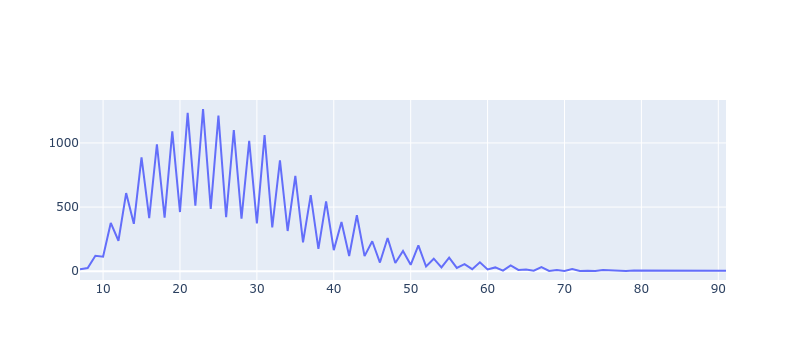

In [88]:
formulaSizes = df["formulaSize"].unique()
formulaSizes.sort()

countsPerSize = [len(df[df['formulaSize']==x]) for x in formulaSizes ]
fig = go.Figure(go.Scatter(x=formulaSizes, y=countsPerSize, name="formulas count"))
fig.show()

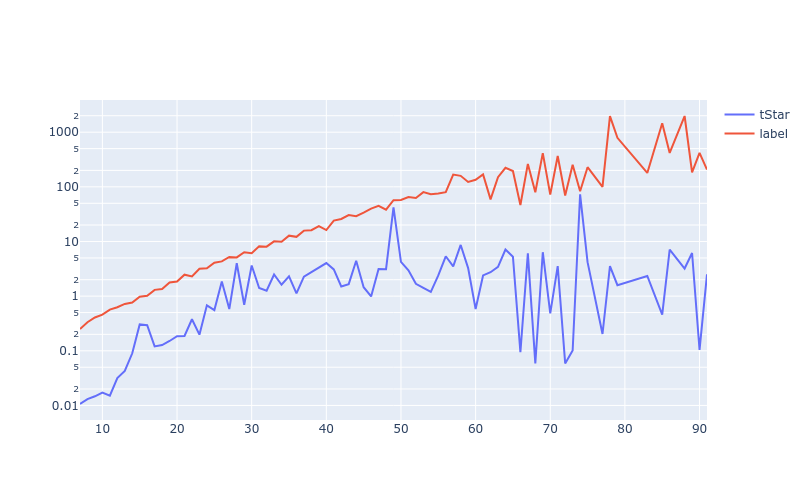

In [83]:


formulaSizes

timesTStar = [df[df['formulaSize']==x]['timeTStarMs'].mean() for x in formulaSizes ]
timesLabel = [df[df['formulaSize']==x]['timeLabelMs'].mean() for x in formulaSizes ]


fig = go.Figure(go.Scatter(x=formulaSizes, y=timesTStar, name="tStar"))
fig.add_trace(go.Scatter(x=formulaSizes, y=timesLabel, name="label"))
fig.update_yaxes(type="log")
fig.update_layout(autosize=False, height=500)
fig.show()